# Ahmad Firdaus Azri

## What combination of Device and Internet Type produces the best adaptivity level of students to online classes? What is the worst? 


Device and Internet Type columns caught my attention because different combinations of devices (Mobile, Tab & Computer) and internet type (Mobile data & Wi-Fi) result to different / similar adaptivity level of students. Thus, I am wondering if there are certain combinations of these components that result to "High" and "Low" adaptivity level the most. 

### My plan:
Used columns: 
- Financial Condition
- Internet Type
- Device
- Adaptivity Level

Definition of: 
- Best combination: A combination whose frequency of “High” adaptivity level is the highest
- Worst combination: A combination whose frequency of “Low” adaptivity level is the highest

Chosen data visualization for exploratory:
- Scatter plot: To see the distribution of data points based on `Internet Type` and `Device` as it able to roughly visualizes which combination has the most or the least count of students. Besides, it is possible also to have 0 student who has certain combination used for their online education. 
- Point plot: To be able to detect which combination is the best and the worst instantly based on the height of the data points. 
- Count plot: Performing the same function as point plot but with different visualization because it looks exactly like a barplot.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

mainDF = pd.read_csv("../data/raw/adaptability.csv")
mainDF

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [2]:
df = mainDF.drop(["Gender", "Age", "Education Level", "Institution Type", "IT Student", "Location", "Load-shedding", "Network Type", "Class Duration", "Self Lms"], axis = "columns")
df

,Financial Condition,Internet Type,Device,Adaptivity Level
0,Mid,Wifi,Tab,Moderate
1,Mid,Mobile Data,Mobile,Moderate
2,Mid,Wifi,Mobile,Moderate
3,Mid,Mobile Data,Mobile,Moderate
4,Poor,Mobile Data,Mobile,Low
...,...,...,...,...
1200,Mid,Wifi,Mobile,Low
1201,Mid,Wifi,Mobile,Moderate
1202,Mid,Mobile Data,Mobile,Moderate
1203,Mid,Wifi,Mobile,Low


First and foremost, it is important to identify how many combinations available and what are they. Since we have 3 types of `Devices` (Computer, Tab & Mobile) 2 kinds of `Internet Type` (Wifi & Mobile Data), so it is certain that there are 6 combinations of `Device` and `Internet Type` altogether. 

Combinations: 
- Wifi & Computer (W + C)
- Wifi & Tab (W + T)
- Wifi & Mobile (W + M)
- Mobile Data & Computer (MD + C)
- Mobile Data & Tab (MD + T)
- Mobile Data & Mobile (MD + M)

Therefore, it is wise to create a new column in `df` named `Combination` which states what combination of `Device` and `Internet Type`each student has.

In [70]:
def combineDeviceInternet(df):
    if((df["Internet Type"] == "Wifi") and (df["Device"] == "Computer")):
        return "W + C"
    elif((df["Internet Type"] == "Wifi") and (df["Device"] == "Tab")):
        return "W + T"
    elif((df["Internet Type"] == "Wifi") and (df["Device"] == "Mobile")):
        return "W + M"
    elif((df["Internet Type"] == "Mobile Data") and (df["Device"] == "Computer")):
        return "MD + C"
    elif((df["Internet Type"] == "Mobile Data") and (df["Device"] == "Tab")):
        return "MD + T"
    else: 
        return "MD + M"

In [71]:
df["Combination"] = df.apply(combineDeviceInternet, axis = "columns")
df

,Financial Condition,Internet Type,Device,Adaptivity Level,Combination
0,Mid,Wifi,Tab,Moderate,W + T
1,Mid,Mobile Data,Mobile,Moderate,MD + M
2,Mid,Wifi,Mobile,Moderate,W + M
3,Mid,Mobile Data,Mobile,Moderate,MD + M
4,Poor,Mobile Data,Mobile,Low,MD + M
...,...,...,...,...,...
1200,Mid,Wifi,Mobile,Low,W + M
1201,Mid,Wifi,Mobile,Moderate,W + M
1202,Mid,Mobile Data,Mobile,Moderate,MD + M
1203,Mid,Wifi,Mobile,Low,W + M


For our first data visualization, let's try categorical scatter plot

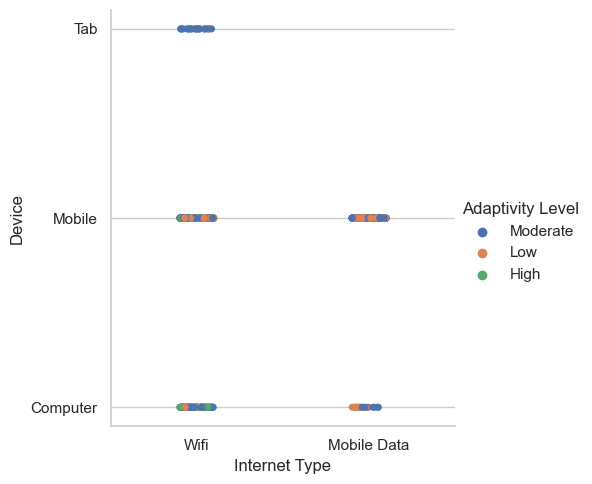

In [72]:
sns.catplot(data = df, x = "Internet Type", y = "Device", hue = "Adaptivity Level")

Well, that does not really help us in finding the answer because of few things:
- Those plots are overlapping with each other despite of their different colours.
- It is very unclear which combination has the most count for high and low adaptivity level.

However, at this point we know that there is no student who has a combination of Tab and Mobile Data for their online classes since there is not data plot marked for it. 

Now, let's try point plots. But before that, we need a set of numerical data to do so and it is a problem because we do not have anything numerical in our dataset yet. So, the count of `Adaptivity Level` (Low, Moderate, High) will be our numerical data. To do so, we need to do some wranggling process with our `df` before produce a point plot.

In [73]:
# Despite having 6 possible combinations, we only create 5 subsets only because the count of combination of Mobile Data and Tab is 0 as shown in scatter plot above.
df1 = df[df["Combination"] == "W + C"]
df2 = df[df["Combination"] == "W + T"]
df3 = df[df["Combination"] == "W + M"]
df4 = df[df["Combination"] == "MD + C"]
df5 = df[df["Combination"] == "MD + M"]

In [74]:
def countLevel(df):
    high = (df["Adaptivity Level"].values == "High").sum()
    mod = (df["Adaptivity Level"].values == "Moderate").sum()
    low = (df["Adaptivity Level"].values == "Low").sum()
    return [high, mod, low]

In [75]:
count1 = countLevel(df1)
count2 = countLevel(df2)
count3 = countLevel(df3)
count4 = countLevel(df4)
count5 = countLevel(df5)

In [76]:
countDict = {"Combination" : ["W + C", "W + C", "W + C", "W + T", "W + T", "W + T", "W + M", "W + M", "W + M", "MD + C", "MD + C", "MD + C", "MD + M", "MD + M", "MD + M"], 
             "Adaptivity Level" : ["High", "Moderate", "Low", "High", "Moderate", "Low", "High", "Moderate", "Low", "High", "Moderate", "Low", "High", "Moderate", "Low",],
             "Count" : [count1[0], count1[1], count1[2], count2[0], count2[1], count2[2], count3[0], count3[1], count3[2], count4[0], count4[1], count4[2], count5[0], count5[1], count5[2],]}

countDF = pd.DataFrame(countDict)
countDF

,Combination,Adaptivity Level,Count
0,W + C,High,30
1,W + C,Moderate,81
2,W + C,Low,32
3,W + T,High,2
4,W + T,Moderate,26
5,W + T,Low,2
6,W + M,High,32
7,W + M,Moderate,147
8,W + M,Low,158
9,MD + C,High,0


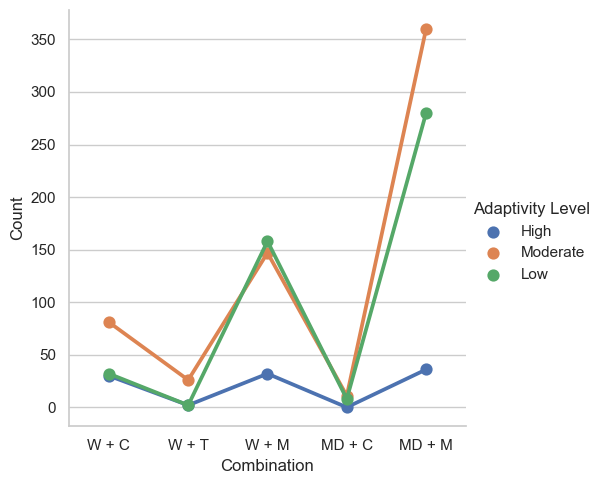

In [77]:
# Construct a point plot
sns.set_theme(style = "whitegrid")
sns.catplot(data = countDF, x = "Combination", y = "Count", hue = "Adaptivity Level", kind = "point")

This plot is much better than the previous scatter plot because we can see the frequencies of high, moderate and low of `Adaptivity Level` for each combination. 

Combination of `MD + M` (Mobile Data and Mobile) produces significantly greater counts of Moderate and Low compared to the other combinations. This is mainly because out of all 5 subsets created above, `df5` (dedicated for Mobile Data and Mobile combination) has the most rows. So, it has a greater chance to return a higher count for all 3 levels. 

Overlapping data points indicate approximately equal count for different `Adaptivity Level` from the same combination. For instance, the combination of `W + C` (WiFi and Computer) and `W + T` (WiFi and Tab). Each of them has almost equal or equal count of High and Low.

However, there is a problem. Unlike for low level, we are not be able to say which combination has the most count for high level because visually, all of those 3 blue points are on the same height. Thus, we need another visualization that can certainly says which `Combination` has the most count for both low and high level of adaptation to online classes.

Fortunately, we can use countplot which do the same thing but it allows us to get the visualization way faster because we do not have to wranggle our dataset to get the count values. Visually, it looks exactly like a barplot.

<Axes: xlabel='Adaptivity Level', ylabel='count'>

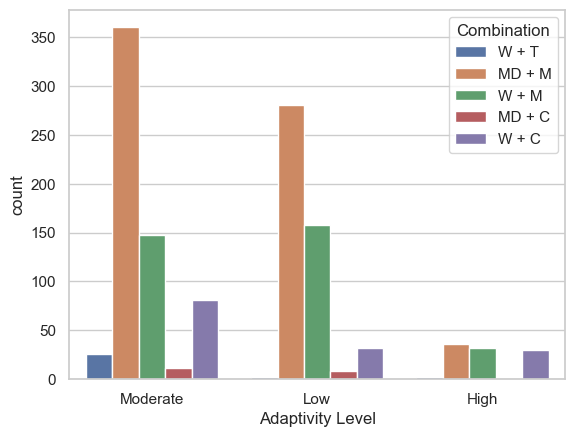

In [78]:
sns.countplot(data = df, x = "Adaptivity Level", hue = "Combination")

Countplot gives us information on which `Combination` has the most count for both High and Low of `Adaptivity Level` based on the height of each bar. Eventually, we can conclude which `Combination` is the best and the worst.